# This Python notebook is only used to nicely plots pulse sequences

### Import libraries and define some plots details

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

### Define some functions for plotting pulses

In [52]:
def cosineRise(t,T0,T1,A):
    return A*((np.cos(np.pi*(t-T0)/(T1-T0)-np.pi)+1)/2)
def cosineFall(t,T0,T1,A):
    return A*((np.cos(np.pi*(t-T0)/(T1-T0))+1)/2)
def platau(t, A):
    return A

def Pulse(t, T0,T1, A, t_rise, t_fall, x):
    y=0
    if (T1-T0)< (t_rise+t_fall):
        print("Total pulse time must be larger than the sum of the rise and fall")
        exit
    if x=='PULSE':
        if t<=(T0+t_rise) and t>T0:
            y=cosineRise(t,T0,T0+t_rise,A)
        if (t>(t_rise+T0) and t<=(T1-t_fall)):
            y=A
        if t>(T1-t_fall) and t<T1:
            y= cosineFall(t,T1-t_fall,T1,A)
            
    if x=='SQUARE':
        if (t<=T1 and t>T0):
            y=A
    return y

### Define traces' parameters and standard Pulses

In [53]:
total_duration=1000       #Total duration in ns
N_channel=2               #How many different lines are there in the experiment?
N_Pulse_Ch=[1,2]          #Number of pulse for each channel



#Define matrix of pulses
#P Channel _ Pulse = [Starting , End, Amplitude, Rise, Fall, TYPE]
Amplitude=1
P1_1=[ 100, 200, Amplitude, 40, 40,'PULSE']
P2_1=[205, 305, Amplitude, 10, 10,'SQUARE']
P2_2=[305, 900, 0.2*Amplitude, 10, 10,'SQUARE']
P=[[P1_1],[P2_1,P2_2]]

#Define Channels Name
Ch_names=['XY', 'RO']
Ch_colors=['blue', 'yellow']

### Define particular case and compose the trace

In [55]:
#define empty list for all the sequences on different channels 
traces=[]

for i in range(N_channel):
    y=np.zeros(total_duration)
    for j in range(N_Pulse_Ch[i]):
        for t in range(total_duration):
             y[t]+=Pulse(t,P[i][j][0], P[i][j][1], P[i][j][2], P[i][j][3], P[i][j][4],P[i][j][5])
    traces.append(np.asarray(y))
#In the list traces there are n channels arrays that represent the pulses


### Plotting the Pulses 

Text(0.5, 0, 'Time (ns)')

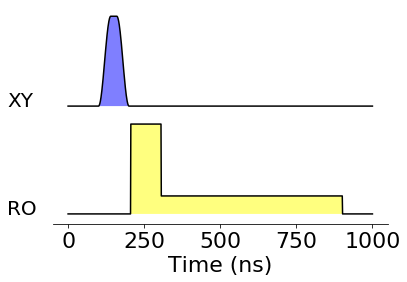

In [56]:
times=np.linspace(0,total_duration, total_duration)
plt.figure(1)
frame=plt.gca()
frame.axes.get_yaxis().set_visible(False)

for i in range(N_channel):
    shift=-np.ones(total_duration)*1.2*Amplitude*i
    plt.plot(times,traces[i]+shift[i], color='black')
    plt.fill_between(times, traces[i]+shift[i],shift[i],facecolor=Ch_colors[i], alpha=0.5)
    plt.text(-200, shift[i], Ch_names[i], fontsize=20)
    

frame.spines['left'].set_visible(False)
frame.spines['right'].set_visible(False)
frame.spines['top'].set_visible(False)

plt.xlabel('Time (ns)')

